## Plotting using PyMaid
This notebook will show you how to use *pymaid* to generate 2d and 3d plots of your neurons of interest. 

First, we need to load the libraries and initialise a CATMAID instance:

In [1]:
import pymaid
import matplotlib.pyplot as plt

print('Updated and tested for PyMaid version {0}'.format(pymaid.__version__))

Updated and tested for PyMaid version 0.76


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/vispy/visuals/isocurve.py:22: UserWarning:

VisPy is not yet compatible with matplotlib 2.2+



In [2]:
from connect_catmaid import *
rm = connect_adult_em()

INFO  : Global CATMAID instance set. (pymaid.fetch)


In [3]:
#Create Catmaid instance
rm = CatmaidInstance( 'https://www.your.catmaid-server.org' , 'http_user' , 'http_password', 'token' )

INFO  : Global CATMAID instance set. (pymaid.fetch)


### Plotting in 2D
`pymaid.plot2d` offers three `methods` to generate 2D plots: 
- `"2D"` (default) plots frontal view in plain 3D 
- `"3D"` uses matplotlibs limited 3D capabilities to generage a "semi-3D" plot. In contrast to real 3D which is rendered pixel by pixel, matplotlib generates vectorgraphics which are limited in their layering. Consider two lines from neuron A and neuron B: line A can only ever be on top of line B or vice versa - they cannot intertwine. This is a problem when plotting multiple neurons. In these cases try using `"3D_complex"`.
- `"3D_complex"` tries fixing some of the issues with matplotlib's 3D by splitting neurons into smaller chunks which enables more complex, more realistic layering.

To plot neuron(s), you can either call the respective pymaid function (`pymaid.plot2d`/`pymaid.plot3d`) or - if you are working with a CatmaidNeuron/List, call it's method `plot2d`/`plot3d`.

In [3]:
# Get a neuron to plot
n = pymaid.get_neuron(16)

HBox(children=(IntProgress(value=0, description='Get neurons: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Plot neurons: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='Plt dotprops: ', max=1), HTML(value='')))

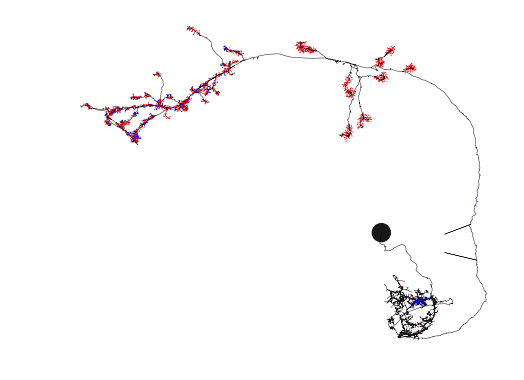

In [4]:
# Two ways to generate the plot:
fig, ax = n.plot2d(connectors = True)
plt.show()

HBox(children=(IntProgress(value=0, description='Plot neurons: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='Plt dotprops: ', max=1), HTML(value='')))

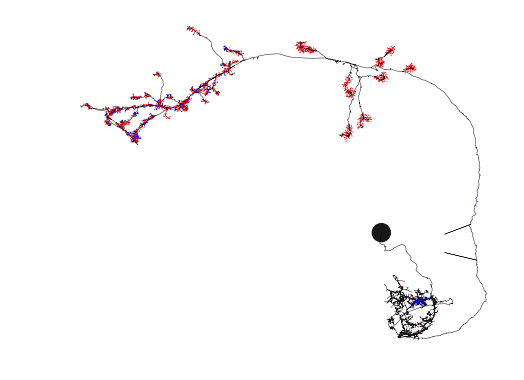

In [5]:
# Second way to generate a plot
fig, ax = pymaid.plot2d( n, connectors = True )
plt.show()

By default, `plot2d` generates a frontal view. But we can also make use of matplotlibs (limited) 3D plotting capacities to change the perspective:

HBox(children=(IntProgress(value=0, description='Plot neurons: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='Plt dotprops: ', max=1), HTML(value='')))

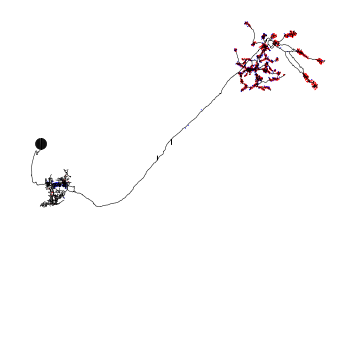

In [8]:
# Plot with method 3d
fig, ax = n.plot2d(method='3d')
# Change camera angle to lateral view
ax.elev = 0
ax.azim = 0
ax.dist = 6
plt.show()

We can also add volumes, like so:

HBox(children=(IntProgress(value=0, description='Plot neurons: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='Plt dotprops: ', max=1), HTML(value='')))

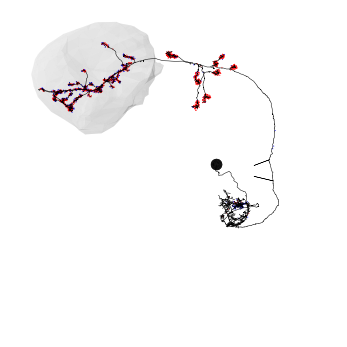

In [9]:
# Get a volume
lh = pymaid.get_volume('LH_R')
# Set its color 
lh['color'] = (220,220,220,.2)
fig, ax = pymaid.plot2d([n,lh], method='3d', connectors=True)
ax.dist = 6
plt.show()

Alternatively use **plt.savefig(filename.svg)** to save a editable vector graphic file. Next, let's try rendering a different neuron in 3D using [plotly](https://plot.ly/). 

### Plotting in 3D
`pymaid.plot3d` offers two backends to generate 3D plots: 
- `vispy` (default) opens an OpenGL window much like `plot3d()` in R. This does not work in jupyter notebooks!
- `plotly` generates .html embedded WebGL plots that can be rendered in jupyter notebooks and shared with other users.

In below example we will try out `plotly`

In [10]:
from plotly import offline as pyoff

#Need to initialize plotly for interactive rendering with Jupyter notebooks
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [11]:
fig = pymaid.plot3d([n, lh],  
                    connectors = False, 
                    fig_autosize = True,
                    backend = 'plotly')

INFO  : Use plotly.offline.plot(fig, filename="3d_plot.html") to plot. Optimised for Google Chrome. (pymaid.plotting)


*plot3d* returns a dictionary that we can pass to plotly to generate a 3d plot. Here, we use `plotly.offline.iplot(fig)` which is used in Jupyter notebooks. If you want to plot3d to file, use `plotly.offline.plot(fig, filename.html)`. Please note that the plot (e.g. line width, etc) may look differently depending on what browser you are using. Generally, layout is optimised for Google Chrome.

In [13]:
pyoff.iplot( fig )